
### Predicting Stroke Risk: A Data-Driven Approach

Stroke is a leading cause of death and disability worldwide, making early prediction and prevention crucial. Leveraging machine learning, we can analyze key health indicators and lifestyle factors to assess the risk of stroke. This project utilizes a comprehensive dataset from Kaggle, including variables such as age, hypertension, heart disease, and lifestyle habits, to build a predictive model. By accurately identifying individuals at high risk, we aim to contribute to public health awareness and preventive healthcare efforts.

---

### Steps for Predicting Stroke Risk

1. **Import Libraries**
   - Load necessary Python libraries for data manipulation, machine learning, and evaluation.

2. **Load the Data**
   - Read the dataset into a pandas DataFrame for analysis and preprocessing.

3. **Handle Missing Values**
   - Identify and fill or remove any missing values in the dataset to ensure data integrity.

4. **Encode Categorical Variables**
   - Convert categorical features into numerical values using techniques like One-Hot Encoding to make them suitable for machine learning algorithms.

5. **Split the Data into Features and Target**
   - Separate the dataset into independent variables (features) and the dependent variable (target) for model training.

6. **Split the Data into Training and Testing Sets**
   - Divide the data into training and testing subsets to evaluate the model's performance on unseen data.

7. **Feature Scaling**
   - Standardize the feature values to have a mean of zero and a standard deviation of one to improve the model's performance.

8. **Train the Model**
   - Use a machine learning algorithm, such as Random Forest, to train a predictive model on the training data.

9. **Make Predictions**
   - Apply the trained model to the test data to predict the target variable.

10. **Evaluate the Model**
    - Assess the model's performance using metrics like accuracy, confusion matrix, and classification report to determine its effectiveness.


In [43]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [44]:
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/healthcare-dataset-stroke-data.csv')


In [45]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [46]:
data.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [47]:
# Check for missing values
print(data.isnull().sum())
#columns bmi contains some null values



id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [48]:
# Fill missing values in the 'bmi' column with the median
data['bmi'].fillna(data['bmi'].median(), inplace=True)

In [49]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [50]:
# Check for missing values
print(data.isnull().sum())
#Now we remove all the null values from our data

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [51]:
# Convert categorical columns to numerical (One-Hot Encoding)
data = pd.get_dummies(data, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], drop_first=True)


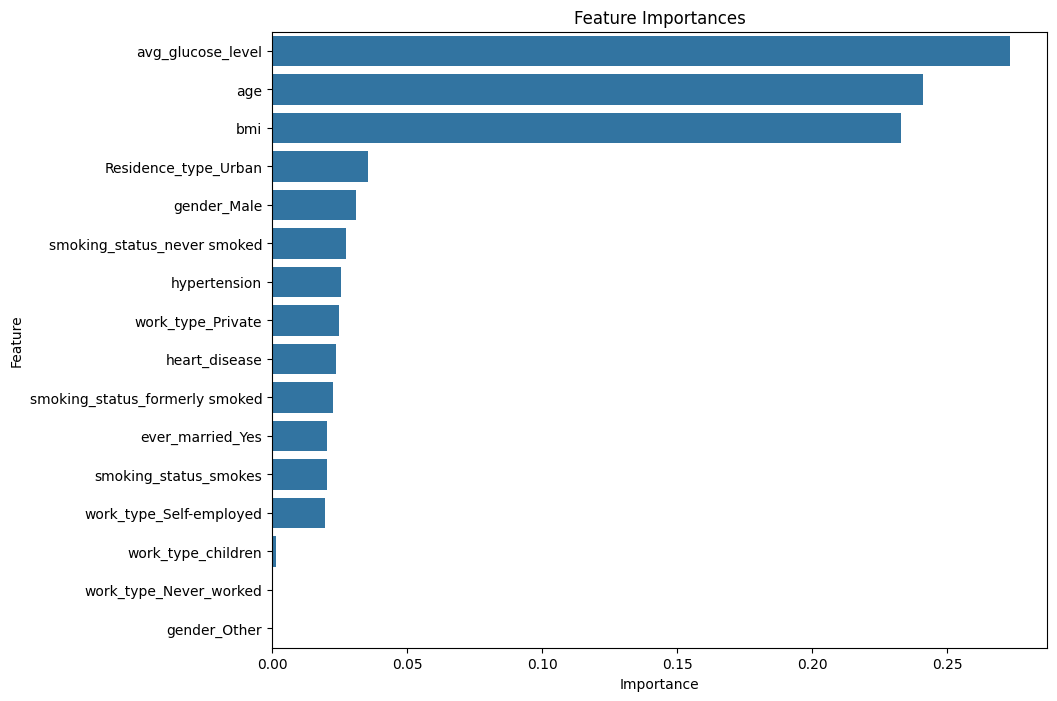

In [52]:
# Feature Importance Plot
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for feature importances
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances')
plt.show()


In [53]:
# Assuming 'stroke' is the target variable
X = data.drop(['id', 'stroke'], axis=1)  # Drop 'id' as it's not a feature
y = data['stroke']


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [55]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [56]:
# Initialize the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [57]:
# Predict on the test data
y_pred = model.predict(X_test)
print(y_pred)

[0 0 0 ... 0 0 0]


In [58]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


Accuracy: 0.9393346379647749
Confusion Matrix:
[[960   0]
 [ 62   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [59]:
#Visualization

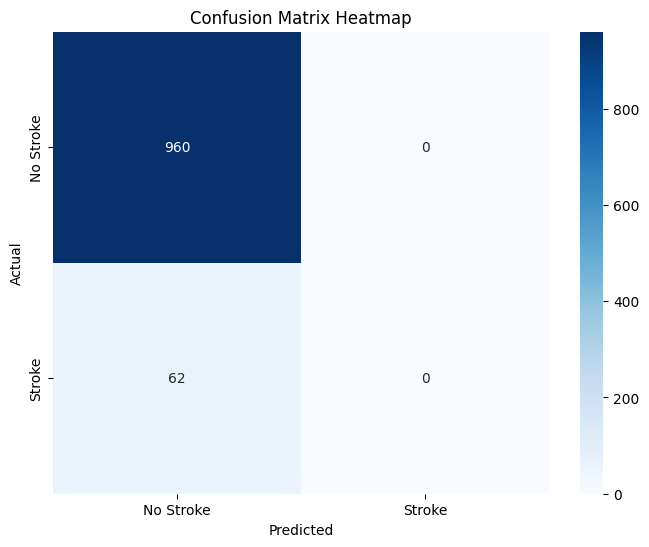

In [60]:
# Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()


In [60]:
#by ManishRana | contributor
#manish_61873_40534